# Translational Motion

This notebook develops solutions to the time-independent Schrödinger equation (TISE) for several translational problems (e.g., particle-in-a-box, tunneling through a one-dimensional barrier, etc.). Relevant Python code is provided to assist in visualizing the wave functions and obtaining numerical solutions to the TISE.

## The Free Particle

### The Wave Function and Its Properties
Consider the Hamiltonian for particle moving in one dimension (1D)

$$\hat{H} = \hat{T}_x + \hat{V}(x) $$

In the free particle problem, the particle is subject to no external forces, which means that the potential term, $\hat{V}(x)$, vanishes, so 

$$\hat{H} = \hat{T}_x = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}$$

Like the other Hamiltonians that will be considered in this notebook, this Hamiltonian does not depend on time. As a result, we can solve the time-independent Schrödinger equation for the spatial part of the wave function, $\psi(x)$,

$$\begin{align}
\hat{H} \psi(x) &= E \psi(x) \\
-\frac{\hbar^2}{2m}\frac{d^2}{dx^2} \psi(x) &= E \psi(x)\\
\end{align}$$

Rearranging the constants, we have

$$\begin{align}
\frac{d^2}{dx^2} \psi(x) &= -\frac{2mE}{\hbar^2} \psi(x)\\
&= -k^2 \psi(x)
\end{align}$$

where we have introduced a constant, $k = +(2mE/\hbar^2)^{1/2}$. Now, we have two useful pieces of information:
1. The wave function should be an eigenfunction of $\frac{d^2}{dx^2}$ (e.g., exponential, sin, or cosine functions)
2. The wave function should have a negative eigenvalue.

A general form for $\psi(x)$ that satisfies both of these requirements is 

$$\psi(x) = A e^{ikx} + B e^{-ikx}$$

Let's verify that this form satisfies the Schrödinger equation

$$\begin{align}
\hat{H}\psi(x) &= -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \left [ A e^{ikx} + B e^{-ikx} \right ] \\
&= ik \left ( -\frac{\hbar^2}{2m} \right ) \frac{d}{dx} \left [ A e^{ikx} + B e^{-ikx} \right ] \\
&= (ik)^2 \left ( -\frac{\hbar^2}{2m} \right ) \frac{d}{dx} \left [ A e^{ikx} + B e^{-ikx} \right ] \\
&= -k^2 \left ( -\frac{\hbar^2}{2m} \right ) \psi(x) \\
&= \frac{k^2\hbar^2}{2m} \psi(x)
\end{align}$$

So, yes, $\psi(x) = Ae^{ik} + Be^{-ikx}$ is an eigenfunction of the Hamiltonian for a free particle moving in one dimension, and 

$$E = \frac{k^2\hbar^2}{2m}$$ 

is the associated eigenvalue. We can draw one interesting conclusion from this result: nothing limits the value that $k$ can take (as long as it is real-valued). As a result, the energy of a free particle is not quantized.

What do the terms $e^{\pm ikx}$ mean, physically? Let's assume that $B = 0,$ so $\psi(x) = Ae^{ikx}$. This function is still an eigenfunction of the Hamiltonian, with the same eigenvalue. Is it an eigenfunction of any other operators, like $\hat{p}_x$? Let's see:

$$\begin{align}
\hat{p}_x A e^{ikx} &= -i\hbar \frac{d}{dx} Ae^{ikx} \\
&= -i^2 \hbar k A e^{ikx} \\
&= \hbar k \psi(x)
\end{align}$$

Yes! $\psi(x) = A e^{ikx}$ is an eigenfunction of $\hat{p}_x,$ with eigenfunction $\hbar k.$ This result indicates that the state described by this function has a well-defined (or definite) value of the momentum in the $x$-direction. Recall, $k = +\left ( \frac{2mE}{\hbar^2} \right )^{1/2},$ so, $k \ge 0$ and $\hbar k \ge 0$, which implies that $p_x \ge 0$. Since the momentum of the particle is positive and well-defined, the state described by $\psi(x) = Ae^{ikx}$ corresponds to the case where the free particle is traveling in the $+x$ direction, with momentum $\hbar k$. If this interpretation is not clear, recall the following

1. Any function can be expanded in terms of eigenfunctions of a Hermitian operator, $\hat{B}$, as
   $$ \psi = \sum_i c_i g_i$$
   where
   $$ \hat{B} g_i = b_i g_i $$
2. Any measurement of $B$ results in one of the eigenvalues, $b_i$. The probability with which we observe $b_i$ is proportional to $|c_i|^2$. The proportionality becomes an equality of the wave function is normalized.
3. If $\psi$ is exactly equal to an eigenfunction of $\hat{B}$, then there is only one term in the sum above, and the only value of $B$ that would ever be observed would be the corresponding eigenvalue. In the case above, we have $\psi(x) = A e^{ikx}$, which we showed is an eigenfunction of $\hat{p}_x$.

We obtain a similar result if we start from the free particle wave function and assume that $A = 0$. In this case, $\psi(x) = B e^{-ikx}$ is also an eigenfunction of $\hat{p}_x$, but the associated eigenvalue is $-\hbar k$. Hence,  $\psi(x) = Be^{-ikx}$ represents a state where the particle has definite value of the momentum, $-\hbar k$ (moving in the $-x$ direction).

The general form of the free-particle wave function is

$$ \psi(x) = A e^{ikx} + Be^{-ikx}$$

Based on the analysis above, this state is a superposition of two pure-momentum states (momentum eigenfunctions), with different values for the momentum. Is this state an eigenfunction of the momentum operator?  We have

$$\begin{align}
\hat{p}_x (A e^{ikx} + Be^{-ikx}) &= \hat{p}_x A e^{ikx} + \hat{p}_x B e^{-ikx} \\
&= \hbar k A e^{ikx} - \hbar k Be^{-ikx} \\
&= \hbar k ( A e^{ikx} - Be^{-ikx})
\end{align}
$$

Note the minus sign. This wave function is not an eigenfunction of the momentum operator. As such, we cannot know whether the particle is moving to the left or the right without taking a measurement. The probability of finding the particle moving to the right will be proportional to $|A|^2$, while the probability of finding the particle moving to the left will be proportional to $|B|^2$.

What about other properties, such as position? We can proceed as we did above. Let us assume $B=0$ and check if $\psi(x) = Ae^{ikx}$ is an eigenfunction of the position operator. We have

$$ \hat{x} \psi(x) = A x e^{ikx} $$

Clearly, the function on the right-hand side is a different function of $x$, so we can safely conclude that, no, $\psi(x) = A e^{ikx}$ is not an eigenfunction of the position operator. While the state represented by this wave function does not have a definite position, we can still calculate the expectation value of position. We have

$$\begin{align}
\langle x \rangle &= \frac{\langle \psi(x)|x|\psi(x)\rangle}{\langle \psi(x) | \psi(x) \rangle} \\
&= \frac{|A|^2\int_{-\infty}^{\infty} e^{-ikx} x e^{ikx} dx}{|A|^2\int_{-\infty}^{\infty} e^{-ikx} e^{ikx} dx} \\
&= \frac{\int_{-\infty}^{\infty} x dx}{\int_{-\infty}^{\infty} dx} \\
&= 0
\end{align}$$

This result does not tell us much, only that, after infinitely-many mesurements, the average position is zero, which implies that we are equally likely to find the particle at $+x$ and $-x$.

The Born interpretation of the wave function provides a result consistent with this one. The probability density

$$ |\Psi(x)|^2 = |A|^2 e^{-ikx} e^{ikx} = |A|^2$$

is equal to a constant over all space, which implies we're equally likely to find the particle *anywhere* in $x$. Put another way, we have no idea where the particle will be located before a measurement is taken.


### Heisenberg Uncertainty Principle

This result is a specific manifestation of Heisenberg's Uncertainty Principle. It is impossible to specify, with arbitrary precision, both the position and momentum of a quantum mechanical particle. The wave function $\psi(x) = A e^{ikx}$ represents a state with a well-defined value for the momentum, meaning we know exactly what the momentum is for the particle in this state. As a consequence, we cannot know anything about the position of the particle. 

Mathematically, we have 

$$\Delta x \Delta p_x \ge \frac{1}{2}\hbar$$

where $\Delta \Omega$ represents the uncertainty in the observable $\Omega$. The uncertainty is calculated as the standard deviation

$$\Delta \Omega = \left ( \langle \Omega^2 \rangle - \langle \Omega \rangle^2 \right )^{1/2}$$

The uncertainty relationship between position and momentum is a consequance of the particle-wave duality of microscopic particles. See Section 1.3 of Levine's "Quantum Chemistry" textbook (5th Ed.) for a graphical illustration of this concept. 

Let's calculate the uncertainty in position and momentum for the state represented by the wave function $\psi(x) = A e^{ikx}$. Because $\psi(x)$ is an eigenfunction of the momentum operator, we immediately know that

$$\begin{align}
\langle p_x \rangle &= \hbar k \\
\langle p_x^2 \rangle &= \hbar^2 k^2
\end{align}$$

In the second line, we take advantage of the fact that an eigenfunction of an operator $\hat{B}$ is also an eigenfunction of the operator $\hat{B}^2$. Now, the uncertainty in the momentum is 

$$\begin{align}
\Delta p_x =& \left ( \langle p_x^2 \rangle - \langle p_x \rangle^2 \right )^{1/2} \\
&= \left( \hbar^2 k^2 - \hbar^2 k^2 \right )^{1/2} \\
&= 0
\end{align}$$

Note that, in general, a variance / standard deviation of zero for a given property implies that the state is an eigenfunction of the operator associated with that observable. 

Now, consider the uncertainty in $x$, 

$$\begin{align}
\Delta x =& \left ( \langle x^2 \rangle - \langle x \rangle^2 \right )^{1/2}
\end{align}$$

We showed already that $\langle x \rangle = 0$. Next, we have

$$\begin{align}
\langle x^2 \rangle &= \frac{\langle \psi(x)|x^2|\psi(x)\rangle}{\langle \psi(x) | \psi(x) \rangle} \\
&= \frac{|A|^2\int_{-\infty}^{\infty} e^{-ikx} x^2 e^{ikx} dx}{|A|^2\int_{-\infty}^{\infty} e^{-ikx} e^{ikx} dx} \\
&= \frac{\int_{-\infty}^{\infty} x^2 dx}{\int_{-\infty}^{\infty} dx}
\end{align}$$

Both the numerator and denomator are integrals over even functions, which are infinite, but the numerator is a larger infinity and thus

$$ \langle x^2 \rangle = \infty$$

and

$$ \Delta x = \infty $$

Hence, there is an infinite uncertainty in the position of the particle represented by the state, $\psi(x) = A e^{ikx}$. This result is consistent with the Born interpretation of the state suggesting that one would be equally likely to find the particle anywere, and, thus, we have no idea where the particle is without taking a measurement. 

More generally, the Heisenberg Uncertainty Principle applies to other pairs of observables, $A$ and $B$. Specifically, the product of uncertainties in $A$ and $B$ are bounded by

$$ \Delta A \Delta B \ge \frac{1}{2} |\langle [\hat{A}, \hat{B}]\rangle|$$

If $\hat{A}$ and $\hat{B}$ commute, then 

$$ \Delta A \Delta B \ge 0$$

which suggests that it would be possible for states to exist where the uncertainties in $A$ and $B$ are both zero. On the other hand, if $\hat{A}$ and $\hat{B}$ do not commute, then there is some finite lower bound to the degree to which $A$ and $B$ can be known simultaneously.

If $[\hat{A}, \hat{B}] = 0$ and $\Delta A$ and $\Delta B$ are both zero, then the state would be an eigenfunction of both $\hat{A}$ and $\hat{B}$, which brings us to a theorem

**Theorem**: If Hermitian operators $\hat{A}$ and $\hat{B}$ commute, then there exists a common, complete set of eigenfunctions of these operators.

Stated another way, if $\hat{A}$ and $\hat{B}$ have a common, complete set of eigenfunctions, then they *must* commute.

**Proof**

Consider linear Hermitian operators $\hat{A}$ and $\hat{B}$ that share a common set of eigenfunctions:

$$\begin{align}
\hat{A} g_i &= a_i g_i \\
\hat{B} g_i &= b_i g_i
\end{align}$$

Now, consider a general function, $f$, that is expanded in terms of these functions, $\{g_i\}$, which form a complete set

$$ f = \sum_k c_k g_k $$

Let us evaluate how the commutator of $\hat{A}$ and $\hat{B}$ act on this function

$$\begin{align}
[\hat{A}, \hat{B}]f &= [\hat{A}, \hat{B}]\sum_k c_k g_k \\
&= (\hat{A}\hat{B} -\hat{B}\hat{A})\sum_k c_k g_k\\
&= \sum_k c_k \left [ \hat{A} (\hat{B}g_k) - \hat{B}(\hat{A}g_k) \right ]\\
&= \sum_k c_k \left [ b_k \hat{A} g_k - a_k \hat{B} g_k \right ] \\
&= \sum_k c_k \left [ b_k a_k - a_k b_k \right ] g_k \\
[\hat{A}, \hat{B}]f &= 0
\end{align}$$

Therefore $[\hat{A}, \hat{B}] = 0$. 

If we can write down free-particle wave functions that are eigenfunctions of both the Hamiltonian and the momentum operator (i.e., $\psi(x) = C e^{\pm ikx})$, then these operators must commute. Recall that the free-particle Hamiltonian is purely kinetic, and the kinetic energy operator can be expressed in terms of the momentum operator

$$\hat{H} = \hat{T} = \frac{\hat{p}_x^2}{2m} $$

Now, it should be clear after this discussion that  the commutator between this operator and the momentum operator should vanish. Indeed, it does,

$$\begin{align}
[\hat{H}, \hat{p}_x] &= [\frac{\hat{p}_x^2}{2m}, \hat{p}_x] \\
&= \frac{1}{2m} [\hat{p}_x^2, \hat{p}_x] \\
&= 0
\end{align}$$

because, as we learned in the last notebook, the commutator of any operator with any power of itself is zero.

> Practice
>
> Question 1: Derive the result
>
> $$ \Delta x \Delta p_x \ge \frac{1}{2} \hbar$$
>
> using the general expression for Heisenberg's Uncertainty principle
>
> $$\Delta x \Delta p_x \ge \frac{1}{2} | \langle [ \hat{x}, \hat{p}_x ] \rangle |$$
>
><details>
><summary>Answer 1</summary> 
>Let us first evaluate the commutator of $\hat{x}$ and $\hat{p}_x$:
>$$\begin{align}
    [\hat{x}, \hat{p}_x]f &= x \left ( -i\hbar \frac{d}{dx}\right ) f - \left (-i\hbar \frac{d}{dx}\right ) x f \\
    &= -i\hbar x f^\prime + i\hbar( f + x f^\prime) \\
    [\hat{x}, \hat{p}_x]f &= i\hbar f
\end{align}$$
>
>Therefore $[\hat{x}, \hat{p}_x] = i\hbar$. Now, insert this result into the expression for the joint uncertainty in $x$ and $p_x$
>$$ \Delta x \Delta p_x \ge \frac{1}{2} | \langle i\hbar \rangle |$$
>For the expectation value, we have
$$\begin{align}
\langle i\hbar \rangle &= \frac{\langle \psi | i \hbar | \psi \rangle }{\langle \psi | \psi \rangle }\\
&= i \hbar \frac{\langle \psi | \psi \rangle }{\langle \psi | \psi \rangle } \\
&= i\hbar
\end{align}$$
>For any non-zero wave function, $\psi$. So
>$$\begin{align}\Delta x \Delta p_x &\ge \frac{1}{2} | i\hbar |\\
&\ge \frac{1}{2} \hbar
\end{align}$$
because
>$$|i\hbar| = \left [ (-i\hbar)(i\hbar) \right]^{1/2} = \left [ \hbar^2 \right ]^{1/2} = \hbar$$
></details>

## Infinite Square Well Potential

A particle confined to an infinite square well potential, also called the particle-in-a-box (PIB), is a useful model for translational motion of a confined quantum mechanical particle. The model is crude, it but can still capture some qualitative trends in the electronic structure of molecular systems. For example, the one-dimensional PIB model can predict the red-shift in excitation energies as the length of a dye molecule increases:

In [18]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/deprincelab/deprincelab.github.io/main/tutorials/jupyter_notebooks/translation/pib_red_shift.png")

Obviously, the agreement with experiment is not great, but it is surprisingly good, given the crudeness of the model. As will be discussed below, particles (in the case above, electrons) feel no potential inside the "box" (the $\pi$-network of the dye molecules), despite the presence of the nuclei and other electrons.

### One-Dimensional Particle-in-a-Box

Consider a particle of mass, $m$, that is moving in the $x$-direction and experiences an infinite square potential of width, $L$. Graphically, this potential has the form:

In [19]:
Image(url = "https://raw.githubusercontent.com/deprincelab/deprincelab.github.io/main/tutorials/jupyter_notebooks/translation/infinite_square_well_potential.png")

Mathematically, we define this potential in a piecewise way as

**Region I**:

$V(x) = \infty$, $x < 0$

**Region II**:

$V(x) = 0$, $0 \le x \le L$

**Region III**: 

$V(x) = \infty$, $x > L$

As such, the TISE should be solved in a piecewise way, i.e., for each region of space. We have

$$\begin{align}
\psi(x) = \psi_I(x) ~~~ &\text{if } x < 0 \\
\psi(x) = \psi_{II}(x) ~~~ &\text{if } 0 \le x \le L \\
\psi(x) = \psi_{III}(x) ~~~ &\text{if } x > L
\end{align}$$

where $\psi_I$, $\psi_{II}$, and $\psi_{III}$ satisfy

$$\begin{align}
\hat{H} \psi_I(x) = E \psi_I(x) ~~~ &\text{if } x < 0 \\
\hat{H} \psi_{II}(x) = E \psi_{II}(x) ~~~ &\text{if } 0 \le x \le L \\
\hat{H} \psi_{III}(x) = E \psi_{III}(x) ~~~ &\text{if } x > L
\end{align}$$

To start, what does the wave function look like outside of the box (in regions I and III)? Consider the Schrödinger equation for region I:

$$\begin{align}
\hat{H}\psi_I(x) &= E \psi_I \\
\left [ -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) \right ] \psi_I(x) &= E \psi_I(x) \\
-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi_I(x) &= [E-V(x)]\psi_I(x) \\
\frac{1}{V(x)-E}\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi_I(x) &= \psi_I(x)
\end{align}$$

Recall that the potential is infinite in this region of space, so,

$$ \psi_I(x) = \lim_{V(x)\to \infty} \frac{1}{V(x)-E}\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi_I(x) = 0$$

From this simple analysis, we can conlude that the wave function must go to zero as $V(x)$ approaches infinity. Therefor the probability of finding a particle at $x \le 0$ is zero ($|\psi_I(x)|^2 = 0$). This result makes sense because the particle would need infinite kinetic energy to overcome the infinite potential energy barrier required to enter that region of space.

A similar analysis for region III leads to 

$$ \psi_{III}(x) = 0 $$

In region II, the Schrödinger equation has a non-trivial solution. We have

$$\begin{align}
\hat{H}\psi_{II}(x) &= E\psi_{II}(x) \\
-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \psi_{II}(x) &= -E\psi_{II}(x) \\
\frac{d^2}{dx^2} \psi_{II}(x) &= -\frac{2mE}{\hbar^2} \psi_{II}(x) \\
\frac{d^2}{dx^2} \psi_{II}(x) &= -k^2 \psi_{II}(x) \\
\end{align}$$

with $k = \left ( \frac{2mE}{\hbar^2} \right )^{1/2}$. Like the free-particle, a general solution to this differential equation is

$$ \psi_{II}(x) = A e^{ikx} + B e^{-ikx} $$

Unlike the free-particle problem, the probability amplitudes, $A$ and $B$, can be determined by considering the boundary conditions for the problem. These are the conditions that must be satisfied by the wave function in order for it to be well-behaved. Before applying these conditions, note that it will actually be easier to solve this problem by representing the wave function in terms of sine and cosine functions, as opposed to complex exponential functions. Euler's formula can be used to express $\psi_{II}$ in this way. We have

$$ e^{\pm ikx} = \text{cos}(kx) + i \text{sin}(\pm kx) $$

or 

$$ e^{\pm ikx} = \text{cos}(kx) \pm i \text{sin}(kx) $$

Given this relationship, it is eash to show that

$$\psi(x) = (A+B) \text{cos}(kx) + i (A-B)\text{sin}(kx)$$

or 

$$\psi(x) = C \text{cos}(kx) + D \text{sin}(kx)$$

where we have introduced new constant factors, $C = A+B$ and $D = i (A-B)$. 

Now, what are $C$ and $D$? As mentioned above, we can determine these constants by the application of boundary conditions. First, in order for $\psi(x)$ to be well-behaved, it must be continuous over all space. In particular, it must be continuous at the edges of the box (at $x=0$ and $x=L$), which places restrictions on $\psi_{II}$, namely

$$\psi_{II}(x = 0) = \psi_{I}(x = 0) = 0$$

and 

$$\psi_{II}(x = L) = \psi_{III}(x = L) = 0$$

For the first of these conditions, we have

$$ \begin{align}
0 &= \psi_{II}(0) \\
&= C \text{cos}(0) + D \text{sin}(0) \\
&= C
\end{align}$$

and the wave function simplifies to 

$$ \psi_{II}(x) = D \text{sin}(kx)$$

The second boundary condition gives us

$$0 = \psi_{II}(L) = D \text{sin}(k L)$$

This equation could be satisfied with the choice $D = 0$, but then $\psi(x)$ would be zero over all space, which means that $|\psi(x)|^2 = 0$ over all space, implying that there is zero probability of finding the particle anywhere. We reject this unphysical solution. How else can this equation be satisfied? The sine function must be zero; the following Python code will visualize where this is the case:

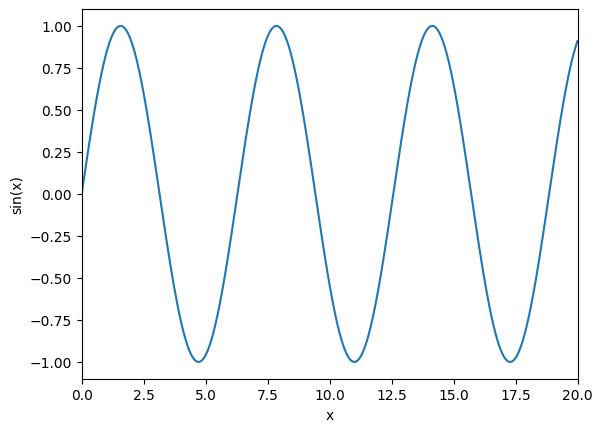

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 20, 0.01)
sin_x = np.sin(x)

plt.figure()
plt.plot(x, sin_x)
plt.xlim(0, 20)
plt.ylabel('sin(x)')
plt.xlabel('x')
plt.show()

$\text{sin}(x)$ is zero whenever $x = n \pi$, where $n$ is an integer. So, the boundary condition can be satisfied if $kL = n\pi$, giving $k = \frac{n\pi}{L}$ and

$$ \psi_{II}(x) = D \text{sin}\left (\frac{n\pi x}{L}\right )$$

We have not yet determined the constant $D$, but we did stumble upon an interesting result. Recall that $k$ is related to the energy:

$$ k = \left ( \frac{2 m E}{\hbar^2} \right )^{1/2} = \frac{n\pi}{L}$$

Rearranging for the energy, we find

$$ E_n = \frac{\hbar^2 n^2 \pi^2}{2 m L^2}$$

or, since $\hbar = \frac{h}{2\pi}$

$$ E_n = \frac{h^2 n^2}{8 m L^2}$$

Here, we have added a subscript "$n$" to the symbol for the energy to denote that the energy for each state can be labeled by $n$. Because $n$ must be an integer, the energy for a PIB is <u>quantized</u>, which means that it can only take on certain values, and the quantization of the energy results from applying restrictions to the wave function. We call $n$ a <u>quantum number</u>; this quantum number characterizes the state of the particle.

Are there any other restrictions on the value that $n$ can take, aside from being an integer? Yes. First, consider the case where $n=0$:

$$ \psi_{II}^{n=0}(x) = D \text{sin} \left ( \frac{0 x \pi}{L} \right ) = 0$$

which would imply that the wave function is zero everywhere. We already rejected such a situation as unphysical earlier, and the do the same here. The case $n=0$ is not allowed. What about $n < 0$? Let's try $n=-1$:

$$ \begin{align}
\psi_{II}^{n=-1}(x) &= D \text{sin} \left ( \frac{-1 x \pi}{L} \right ) \\
&= -D \text{sin} \left ( \frac{1 x \pi}{L} \right ) \\
&= \psi_{II}^{n=1}(x)
\end{align}$$

More generally, 

$$ \psi_{II}^{-n}(x) = -\psi_{II}^{n}(x) $$

When introducing the concept of normalization in the last notebook, we discussed idea that two states that differ by only a multiplicative constant represent the same state. So, because the wave functions for $n$ and $-n$ differ by only a sign, they must represent the same state. For this reason, we ignore all $n < 0$, because these states are redundant. Hence, the allowed values for $n$ are all *positive* integers, 1, 2, 3, etc. The lowest-energy state (having $n=0$) is the "ground state." All other PIB states have higher energy and are called "excited states."

After applying two boundary conditions, we have yet to determine the constant $D$. This constant can be determined by normalization:

$$\begin{align}
\int_{-\infty}^{\infty} |\psi(x)|^2 dx &= 1 \\
&= \int_{-\infty}^{0} |\psi_I(x)|^2 dx + \int_{0}^{L} |\psi_{II}(x)|^2 dx + \int_{L}^{\infty} |\psi_{III}(x)|^2 dx
&= \int_{0}^{L} |\psi_{II}(x)|^2 dx
\end{align}$$

because the integrals over $|\psi(x)|^2$ in regions I and III are zero. Now,

$$\begin{align}
1 &= |D|^2 \int_0^L \text{sin}^2\left ( \frac{n \pi x}{L} \right ) dx \\
&= \frac{1}{2} D^2 \int_0^L \left [ 1 - \text{cos}\left ( \frac{2 n \pi x}{L}\right ) \right ] dx \\
&= \left . \frac{1}{2} D^2 \left [ x - \frac{L}{2\pi n}\text{sin}\left ( \frac{2 \pi n x}{L} \right ) \right ]  \right|_0^L \\
&= \frac{1}{2}D^2 L\\
D &= \left ( \frac{2}{L} \right ) ^{1/2}
\end{align}$$

where, in the second line, we assumed that $D$ is real-valued, and made use of the double angle formula $[2 \text{sin}^2(t) = 1 - \text{cos}(2t)].$ Now, we have fully defined the spatial wave function for the one-dimensional PIB problem:

$$ \begin{align}
\psi_n(x) &= \left ( \frac{2}{L} \right)^{1/2} \text{sin}\left ( \frac{n\pi x}{L}\right)\text{, if } 0 \le x \le L \\
&= 0\text{, otherwise}
\end{align}$$

and the energy of the state represented by this wave function is $E_n$.

Let's visualize the wave functions and probability densities for the first few $n$. For simplicity, we will take the particle to be an electron with mass, $m = m_e$, and we will use atomic units, where $\hbar = 1$ and $m_e = 1$. The length of the box will be $L = 1 a_0$. 

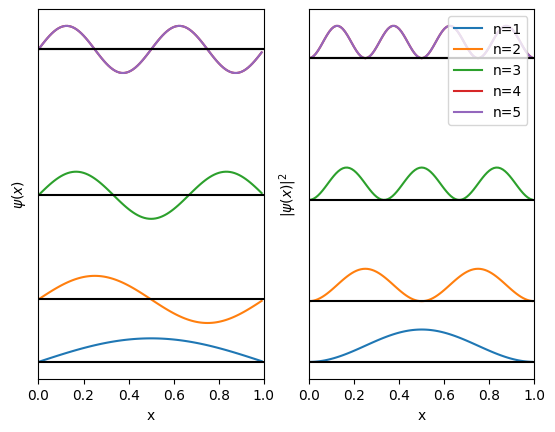

In [56]:
L = 1.0
hbar = 1.0
m = 1.0

x = np.arange(0, L, 0.01)

wfn_1 = np.sqrt(2.0 / L) * np.sin(1 * np.pi * x / L)
wfn_2 = np.sqrt(2.0 / L) * np.sin(2 * np.pi * x / L)
wfn_3 = np.sqrt(2.0 / L) * np.sin(3 * np.pi * x / L)
wfn_4 = np.sqrt(2.0 / L) * np.sin(4 * np.pi * x / L)
wfn_5 = np.sqrt(2.0 / L) * np.sin(4 * np.pi * x / L)


energy_1 = hbar**2 * 1**2 / ( 8 * m * L**2)
energy_2 = hbar**2 * 2**2 / ( 8 * m * L**2)
energy_3 = hbar**2 * 3**2 / ( 8 * m * L**2)
energy_4 = hbar**2 * 4**2 / ( 8 * m * L**2)
energy_5 = hbar**2 * 4**2 / ( 8 * m * L**2)

# shift wave functions by constant proportional 
# to the energy when plotting
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xlim(0, 1)
ax1.set_yticks(ticks=[])
ax1.set_ylabel(r'$\psi(x)$')
ax1.set_xlabel('x')
ax1.plot(x, wfn_1 + energy_1 * 10, label = 'n=1')
ax1.plot(x, wfn_2 + energy_2 * 10, label = 'n=2')
ax1.plot(x, wfn_3 + energy_3 * 10, label = 'n=3')
ax1.plot(x, wfn_4 + energy_4 * 10, label = 'n=4')
ax1.plot(x, wfn_5 + energy_5 * 10, label = 'n=5')
ax1.axhline(y=energy_1 * 10, color='black')
ax1.axhline(y=energy_2 * 10, color='black')
ax1.axhline(y=energy_3 * 10, color='black')
ax1.axhline(y=energy_4 * 10, color='black')
ax1.axhline(y=energy_5 * 10, color='black')

ax2.set_xlim(0, 1)
ax2.set_yticks(ticks=[])
ax2.set_ylabel(r'$|\psi(x)|^2$')
ax2.set_xlabel('x')
ax2.plot(x, wfn_1**2 + energy_1 * 10, label = 'n=1')
ax2.plot(x, wfn_2**2 + energy_2 * 10, label = 'n=2')
ax2.plot(x, wfn_3**2 + energy_3 * 10, label = 'n=3')
ax2.plot(x, wfn_4**2 + energy_4 * 10, label = 'n=4')
ax2.plot(x, wfn_5**2 + energy_5 * 10, label = 'n=5')
ax2.axhline(y=energy_1 * 10, color='black')
ax2.axhline(y=energy_2 * 10, color='black')
ax2.axhline(y=energy_3 * 10, color='black')
ax2.axhline(y=energy_4 * 10, color='black')
ax2.axhline(y=energy_5 * 10, color='black')

plt.legend(loc='upper right')
plt.show()

We make the following observations:

- the spacing between energy levels increases with $n$
- the wave function oscillates inside the box and is zero outside of the box. As $n$ increases, the oscillations become more rapid.
- for states with $n > 1$, the wave function passes *through* zero $n-1$ times. These points where the wave function passes through zero are called "nodes." There is zero probability of finding the particle at a node (i.e., $|\psi(x)|^2=0$ at the node).
- there is a kink in the wave function at the left- and right-hand edges of the box, so the wave function does not have a continuous first derivative over all space. Recall that the requirement that the wave function be smooth is lifted when the potential is not finite.

Where are we most likely to find the particle? For any $n$, we are most likely to find the particle where $|\psi(x)|^2$ is at a maximum. To find such a point, we first locate the stationary points by setting the first derivative of the probability density equal to zero 

$$\frac{d}{dx}|\psi(x)|^2 = 0$$ 

and solving for $x$. We can verify that the stationary point is a maximum by checking the sign on the second derivative of the probability density. If 

$$ \frac{d^2}{dx^2} |\psi(x)|^2 < 0 $$

the stationary point is a maximum. For the PIB problem, all maxima in $|\psi(x)|^2$ have the same value (meaning we're equally likely to find the particle at any of the maxima). For other problems, this might not be the case; there could be local maxima.

How does the quantum mechanical probability density relate to the classical one? For a classical particle in a box, we would be equally likely to find the particle anywhere in the box (with probability $1/L$), as visualized here:

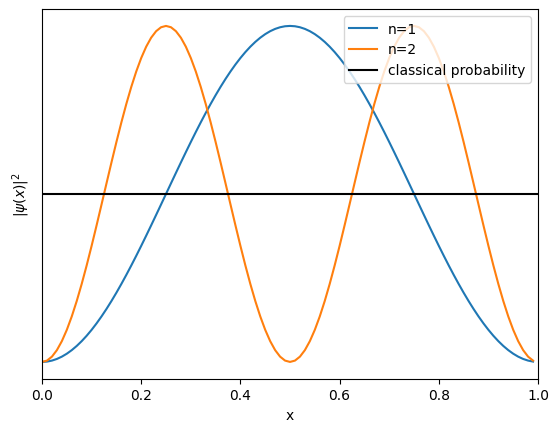

In [65]:
L = 1.0
hbar = 1.0
m = 1.0

x = np.arange(0, L, 0.01)

wfn_1 = np.sqrt(2.0 / L) * np.sin(1 * np.pi * x / L)
wfn_2 = np.sqrt(2.0 / L) * np.sin(2 * np.pi * x / L)

figure = plt.plot()

plt.xlim(0, 1)
plt.yticks(ticks=[])
plt.ylabel(r'$|\psi(x)|^2$')
plt.xlabel('x')
plt.plot(x, wfn_1**2, label = 'n=1')
plt.plot(x, wfn_2**2, label = 'n=2')
plt.axhline(y=1.0, color='black', label = 'classical probability')

plt.legend(loc='upper right')
plt.show()

Clearly, the quantum and classical probability distributions differ, which brings us to an impoartant question. Should quantum mechanics recover classical results in any limit? The anser is yes. The **Bohr Correspondence Principle** states that, in the limit of large quantum numbers, quantum mechanicals will recover classical results. Let us consider the quantum mechanical description of a classical particle, which would have very large $m$ and $L$. Given the form of the energy:

$$ E_n = \frac{\hbar^2 n^2 \pi^2}{2 m L^2}$$

we can conclude that the spacings between energy levels is tiny because $m$ and $L$ are large. As a consequence any non-zero kinetic energy will put the particle in an extremely high-energy state. Let us inspect the probability density for a high-energy state, as compared to the low-energy states and the classical limit.

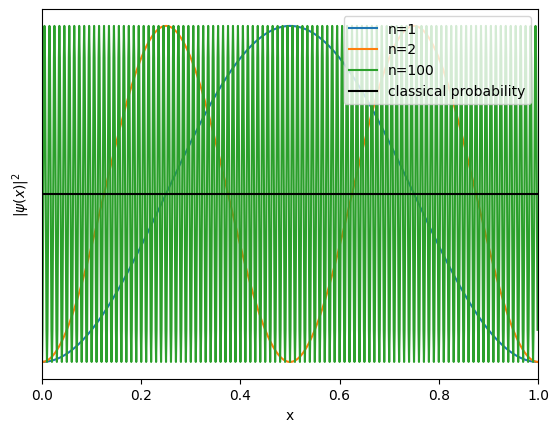

In [64]:
L = 1.0
hbar = 1.0
m = 1.0

x = np.arange(0, L, 0.001)

wfn_1 = np.sqrt(2.0 / L) * np.sin(1 * np.pi * x / L)
wfn_2 = np.sqrt(2.0 / L) * np.sin(2 * np.pi * x / L)
wfn_100 = np.sqrt(2.0 / L) * np.sin(100 * np.pi * x / L)

figure = plt.plot()

plt.xlim(0, 1)
plt.yticks(ticks=[])
plt.ylabel(r'$|\psi(x)|^2$')
plt.xlabel('x')
plt.plot(x, wfn_1**2, label = 'n=1')
plt.plot(x, wfn_2**2, label = 'n=2')
plt.plot(x, wfn_100**2, label = 'n=100')
plt.axhline(y=1.0, color='black', label = 'classical probability')

plt.legend(loc='upper right')
plt.show()

At first glance, it seems like the classical and large-$n$ limits still yield different probability distributions, until we think about the resoultion of any actual measurement of position. For sufficiently high $n$, the oscillations in $|\psi_n(x)|^2$ will be sufficiently rapid that it will be impossible to resolve the difference between a maximum and a minimum in the distribution, and the classical distribution (the average of these) is what is detected.  

> Practice
> 
> Question 2: Show that particle-in-a-box wave functions for different states, $n_i$ and $n_j$ are orthogonal.
>
>
><details>
><summary>Answer 2</summary> 
>
> We have
> $$ \psi_{n_i}(x) = \left ( \frac{2}{L} \right )^{1/2} \text{sin}\left(\frac{n_i \pi x}{L}\right)$$
when $0 \le x \le L$, and $\psi_{n_i}(x) = 0$ otherwise.
The overlap of $\psi_{n_i}(x)$ and $\psi_{n_j}(x)$ is
$$ \begin{align} 
\langle \psi_{n_i} | \psi_{n_j} \rangle &= \int_{-\infty}^{0} |0|^2 dx + \frac{2}{L}  \int_0^L \text{sin}\left(\frac{n_i \pi x}{L} \right )\text{sin}\left(\frac{n_j \pi x}{L} \right ) dx   + \int_L^\infty |0|^2 dx \\
&= \frac{2}{L} \int_0^L \text{sin}\left(\frac{n_i \pi x}{L} \right )\text{sin}\left(\frac{n_j \pi x}{L} \right ) dx
\end{align}$$
Using the trigonometric identity
$$
\text{sin}(n_i x) \text{sin}(n_j x) = \frac{1}{2} \text{cos}\left[(n_i - n_j) x\right] - \frac{1}{2} \text{cos}\left[(n_i + n_j) x\right]
$$
This overlap becomes
$$ \begin{align} 
\langle \psi_{n_i} | \psi_{n_j} \rangle &= \frac{1}{L}  \int_0^L \left ( \text{cos}\left[\frac{(n_i - n_j) \pi x}{L} \right] - \text{cos}\left[\frac{(n_i + n_j) \pi x}{L} \right] \right ) dx \\
 &= \left . \frac{1}{L} \left ( \frac{1}{n_i-n_j}\text{sin}\left[\frac{(n_i - n_j) \pi x}{L} \right] - \frac{1}{n_i+n_j}\text{sin}\left[\frac{(n_i + n_j) \pi x}{L} \right] \right ) \right |_0^L \\
&= 0
\end{align}$$
The limit at $x=L$ is zero because $n_i\pm n_j$ are both integers. 
></details>

In [67]:
before

NameError: name 'before' is not defined

Before moving on, it is worth reiterating that the application of boundary conditions placed restrictions on the form of the wave function, which then led to the quantization of the energy. Essentially, only certain wave functions satisfy the boundary conditions (i.e., are well behaved), and, thus only certain energies are observed. We can supplement these mathematical arguments for the quantization of the energy with the following, more physical arguments.

Recall that all PIB wave functions look like standing waves. If a particle is represented as a wave, then only certain wave lengths will lead to waves that do not interfere destructively with themselves. For a standing wave, the wave length should be a half-integer multiple of the box length, i.e., 

$$ \frac{n \lambda}{2} = L$$

where $n = 1, 2, 3,$ etc. Now, recall the **de Broglie wave length** for a microscopic particle, which is related to the linear momentum, $p$, for that particle

$$ \lambda = \frac{h}{p} $$

If we insert the de Broglie wave length into the standing wave length expression and solve for the momentum, we obtain

$$ p = \frac{n h}{2 L}$$

For the particle-in-a-box problem, the energy is purely kinetic because the potential is zero inside the box and the wave function is zero outside the box. Combining the classical expression for the kinetic energy and the expression above for the momentum yields

$$ E = \frac{p^2}{2m} = \frac{n^2 h^2}{8 mL^2}$$

which is the same result obtained from solving the Schrödinger equation and applying boundary conditions! In this case, simple physical arguments starting from the wave-like nature of microscopic particles leads to the same result as solving the Schrödinger equation directly.

### Three-Dimensional Particle-in-a-Box

## Finite Square Well Potential

Consider a particle of mass, $m$, that is moving in the $x$-direction and experiences a finite square potential of width, $L$, and height, $V_0$. We will assume that the energy of this particle, $E$, is less than $V_0$. Graphically, this potential has the form:

In [2]:
Image(url = "https://raw.githubusercontent.com/deprincelab/deprincelab.github.io/main/tutorials/jupyter_notebooks/translation/square_well_potential.png")

Mathematically, we define this potential in a piecewise way as

**Region I**:

$V(x) = V_0$, $x < 0$

**Region II**:

$V(x) = 0$, $0 \le x \le L$

**Region III**: 

$V(x) = V_0$, $x > L$

### Wavefunctions

Wavefunctions that satisfy the time-independent Schrodinger equation will also have a piecewise form, and we can determine the wavefunction by solving the Schrodinger equation in each region. We have

**Region I**: 

$(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V_0) \psi_I(x) = E \psi_I(x)$

which has solutions of the form

$\psi_I(x) = C~{\rm exp}(\alpha x) + D~{\rm exp}(-\alpha x)$, $x < 0$

**Region II**: 

$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} \psi_{II}(x) = E \psi_{II}(x)$

which has solutions of the form

$\psi_{II}(x) = A~{\rm cos}(\beta x) + B~{\rm sin}(\beta x)$, $0 \le x \le L$

and

**Region III**: 

$(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V_0) \psi_{III}(x) = E \psi_{III}(x)$

which has solutions of the form

$\psi_{III}(x) = F~{\rm exp}(\alpha x) + G~{\rm exp}(-\alpha x)$, $x > l$

Above, $\alpha$ and $\beta$ are real numbers, defined by

$\alpha = ( 2 m [V_0 - E] / \hbar^2)^{1/2}$

$\beta = (2 m E / \hbar^2)^{1/2}$

### Boundary Conditions

If we consider that the wave function should be finite in the limit that $x$ tends to $\pm \infty$, then we immediately find that the coefficients $D$ and $F$ must be zero.

As for the other unknown coefficients, we can determine these through the application of various boundary conditions:

1. The wavefunction should be continuous between regions I and II (at $x=0$). This condition leads us to 

    $C = A$
    

2. The derivative of the wavefunction should be continuous between regions I and II (at $x=0$). This condition leads us to 

    $B = [(V_0 - E)^{1/2} / (E)^{1/2}] A$
    

3. The wavefunction should be continuous between regions II and III (at $x=L$). This condition leads us to 

    $G = A ~[ {\rm cos}(\beta L) + \alpha~ / \beta ~{\rm sin}(\beta L) ] ~{\rm exp}(\alpha L)$
    

4. The derivative of the wavefunction should be continuous between regions II and III (at $x=L$). This condition leads us to a trancendental equation for the energy: 

    ${\rm tan}[(2mE/\hbar^2)^{1/2} L] = 2 (V_0-E)(E)^{1/2}/(2 E-V_0)$
    

Lastly, the coefficent A can be determined by normalization.

### Procedure for visualizing the allowable wavefunctions

In order to determine the allowable energies and corresponding wavefunctions for the particle in a finite square well potential, we will follow the following steps:

1. We should specify parameters $m$, $L$, and $V_0$ that define our problem. 


2. We should plot the trancendental equation for the energy to (a) determine how many bound states we have and (b) to obtain reasonable guesses for these energies.


3. We should numerically solve the trancendental equation using some functionality in the scipy package.


4. Once we have the allowable energies, we can evaluate the corresponding wavefunction parameters defined above.


5. Given the wave function parameters, we can visualize the wavefunction or its square modulus.

In [2]:
# set some parameters (in atomic units, where hbar = 1)
m = 1.0 # mass of particle
L = 1.0 # length of box (from 0 to L)
V0 = 10.0

/var/folders/p7/jsnw6xvd0bx93ym71r58v0nm0000gn/T/ipykernel_26905/3550922940.py:12: RuntimeWarning: divide by zero encountered in divide
  rhs = 2 * np.sqrt(V0-E) * np.sqrt(E) / (2 * E - V0)


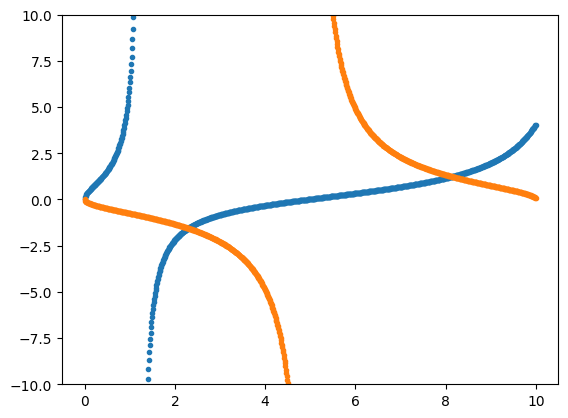

In [3]:
dE = 0.01
E = np.arange(0.0, V0, dE)
#lhs = []
#rhs = []
#for i in range(len(E)):
#    lhs.append(np.tan(np.sqrt(2 * m * E[i]) * L))
#    rhs.append(2 * np.sqrt(V0-E[i]) * np.sqrt(E[i]) / (2 * E[i] - V0))
lhs = np.tan(np.sqrt(2 * m * E) * L)
rhs = 2 * np.sqrt(V0-E) * np.sqrt(E) / (2 * E - V0)

plt.figure()
plt.plot(E, lhs, marker='.', linestyle='')
plt.plot(E, rhs, marker='.', linestyle='')
plt.ylim(-10, 10)
plt.show()

From above, we can see that there are two allowable energies (points at which the blue and orange curves cross, not counting the divergence in the blue curve). These energies look like they are roughly 2.5 and 8.0 (atomic units). We now need to numerically solve the trancendental equation. We're going to use the function:

    optimize.fsolve
    
from the scipy package for this purpose. We will have to pass some objective function $f(E) = 0$ for which this function will find the optimal $E$ value(s).

In [4]:
def allowable_energies(E, *data):
    """
    function defining allowable energies:

    tan[sqrt(2mE) L] - 2sqrt(V-E)sqrt(E)/(2E-V0)

    :param E: the energy
    :return value: the function value
    """
    m, V0, L = data

    return np.tan(np.sqrt(2 * m * E) * L) - 2 * np.sqrt(V0-E) * np.sqrt(E) / (2 * E - V0)

Now, we're ready to solve for the allowable energies.

In [5]:
# solve for the allowable energy, with some reasonable initial guess
from scipy import optimize

E = optimize.fsolve(func = allowable_energies, x0 = [2.5, 8], args = (m, V0, L))

print('the allowable energies are', E)

the allowable energies are [2.29499075 8.13714776]


In [6]:
# let's plot the wave functions
alpha = np.sqrt( 2.0 * m * (V0 - E))
beta = np.sqrt( 2.0 * m * E)

A = 1 # we'll normalize, but start with A = 1
C = A
B = np.sqrt(V0 - E) / np.sqrt(E) * A
G = A * ( np.cos(beta * L) + alpha / beta * np.sin(beta * L) ) * np.exp(alpha * L)

Given the allowable energies, we can calculate the corresponding wavefunction parameters. Since all of the parameters can be expressed in terms of $A$, we start with the choice $A = 1$, but we'll rescale all of the coefficients such that the wavefunction is normalized. 

In [7]:
# define the wave function

dx = 0.01

x = np.arange(-10 * L , 11 * L, dx) 

psi = []
psi2 = []
for myx in x:
    if myx < 0:
        mypsi = C * np.exp(alpha * myx)
        psi.append(mypsi)
        psi2.append(np.abs(mypsi)**2) # in case psi is complex valued
    elif myx < L:
        mypsi = A * np.cos(beta * myx) + B * np.sin(beta * myx)
        psi.append(mypsi)
        psi2.append(np.abs(mypsi)**2)
    else :
        mypsi = G * np.exp(-alpha * myx)
        psi.append(mypsi)
        psi2.append(np.abs(mypsi)**2)

psi = np.array(psi)
psi2 = np.array(psi2)

In [8]:
# normalize the wave function ... 
# it is possible to do this analytically, but let's do it numerically

# N = (1 / int(|psi|^2) )^1/2

for state in range (0, len(alpha)):
    N = np.sqrt(1.0 / np.trapz(psi2[:, state], x = x))
    psi[:, state] *= N
    psi2[:, state] *= N*N

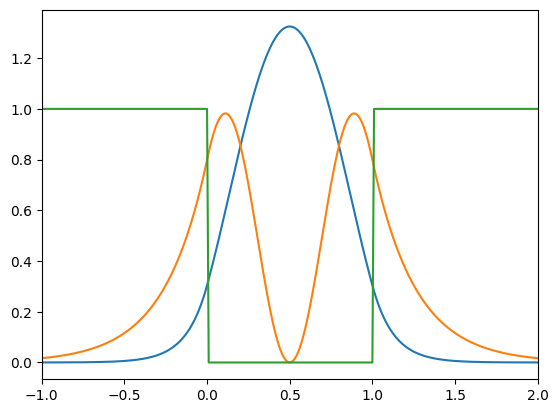

In [9]:
# plot normalized wave functions overlaid over the potential

Vx = []
for xval in x:
    if xval < 0.0:
        Vx.append(V0)
    elif xval < L:
        Vx.append(0.0)
    else:
        Vx.append(V0)

Vx = np.array(Vx)

plt.figure()
plt.plot(x, psi2)
plt.plot(x, Vx * 0.1)
plt.xlim(-1, 2)
plt.show()

### Practice

Now, you should re-run this part of the notebook with different values for the mass ($m$), the width of the well ($L$), and the height of the potential outside of the well ($V_0$). Ask yourself the following questions:

1. Does increasing $V_0$ increase or decrease the number of bound states?

2. Does increasing $L$ increase or decrease the number of bound states?

3. Does increasing $m$ increase or decrease the number of bound states?

4. For a given $m$, $L$, and $V_0$, which bound states have the highest / lowest tunneling probability (the probability of finding the particle outside of the well)? Can you rationalize this result?

5. Can the number of bound states ever be zero, for certain combinations of $m$, $L$, and $V_0$?

## Tunneling Through a Barrier